In [13]:
%cd ..

/Users/treycole/Codes


In [14]:
from WanPy.pythtb_Wannier import *
import WanPy.models as models
import WanPy.plotting as plot

from pythtb import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sympy as sp 
import scipy

In [15]:
delta = 1
t = -1
t2 = 0.2

model = models.Haldane(delta, t, t2).make_supercell([[2,0], [0,2]])

orbs = model.get_orb()
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)
lat_vecs = model.get_lat() # lattice vectors

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)

In [16]:
u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

print(f"Chern number: {chern:.2f}")

Chern number: -1.00


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$C = -1.0$ | $\\Delta = 1,\\ t = -1,\\ t_2 = 0.2$'}, ylabel='Energy $E(\\mathbf{{k}})$ '>)

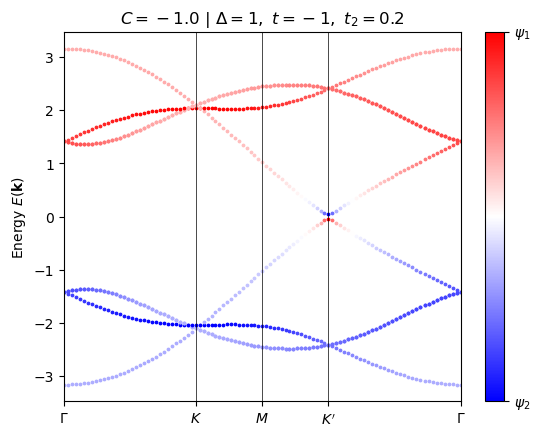

In [17]:
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0]]
k_label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $')
title = title = (rf"$C = {chern: .1f}$ | $\Delta = {delta},\ t = {t},\ t_2 = {t2}$")

plot.plot_bands(
    model, k_path=k_path, k_label=k_label, sub_lat=True, red_lat_idx=high_E_sites, title=title)

In [18]:
# 2D k-mesh
nkx = 20
nky = 20
Nk = nkx*nky

k_mesh = gen_k_mesh(nkx, nky, flat=False, endpoint=False)
k_mesh_flat = gen_k_mesh(nkx, nky, flat=True, endpoint=False)

u_wfs_Wan = wf_array(model, [nkx, nky])

for i in range(k_mesh.shape[0]):
    for j in range(k_mesh.shape[1]):
        u_wfs_Wan.solve_on_one_point(k_mesh[i,j], [i,j])

In [76]:
omit_sites = 2
tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site

In [77]:
W0, psi_til_wan = Wannierize(orbs, u_wfs_Wan, tf_list, ret_psi_til=True)
u_tilde_wan = get_bloch_wfs(orbs, psi_til_wan, k_mesh, inverse=True)

In [78]:
M = k_overlap_mat(lat_vecs, orbs, u_tilde_wan) # [kx, ky, b, m, n]
spread, expc_rsq, expc_r_sq = spread_recip(lat_vecs, M, decomp=True)

print(rf"Spread from M_kb of \tilde{{u_nk}} = {spread[0]}")
print(rf"Omega_I from M_kb of \tilde{{u_nk}} = {spread[1]}")
print(rf"Omega_til from M_kb \tilde{{u_nk}} = {spread[2]}")

Spread from M_kb of \tilde{u_nk} = (0.8395353683809006+0j)
Omega_I from M_kb of \tilde{u_nk} = 0.628269109354017
Omega_til from M_kb \tilde{u_nk} = (0.21126625902692134+0j)


In [79]:
# spread, expc_rsq, expc_r_sq = spread_real(model, w0, decomp=True)

# print(rf"Spread from w0 = {spread[0]}")
# print(rf"Omega_I from w0 = {spread[1]}")
# print(rf"Omega_til from w0 = {spread[2]}")

([<Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 1 Axes>],
 [<Axes: title={'center': '$C = -1.0$ | $\\Delta = 1,\\ t = -1,\\ t_2 = 0.2$\nTrial fxns on sites [0, 4, 6]'}>,
  <Axes: title={'center': '$C = -1.0$ | $\\Delta = 1,\\ t = -1,\\ t_2 = 0.2$\nTrial fxns on sites [0, 4, 6]'}>,
  <Axes: title={'center': '$C = -1.0$ | $\\Delta = 1,\\ t = -1,\\ t_2 = 0.2$\nTrial fxns on sites [0, 4, 6]'}, xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

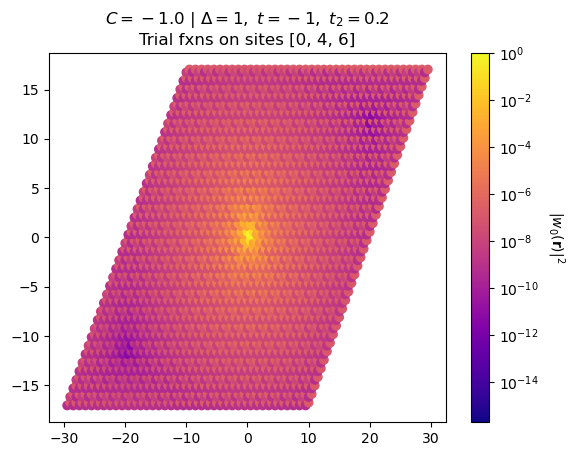

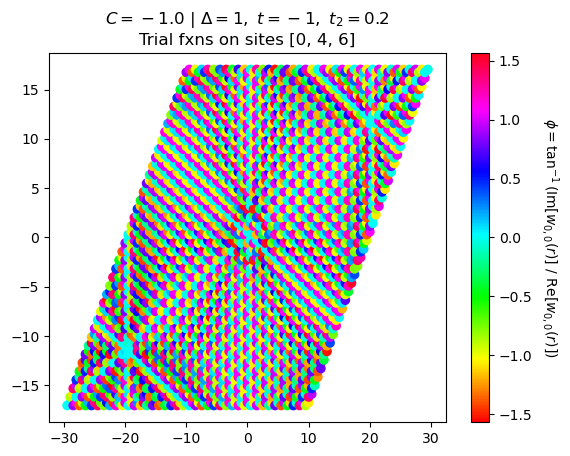

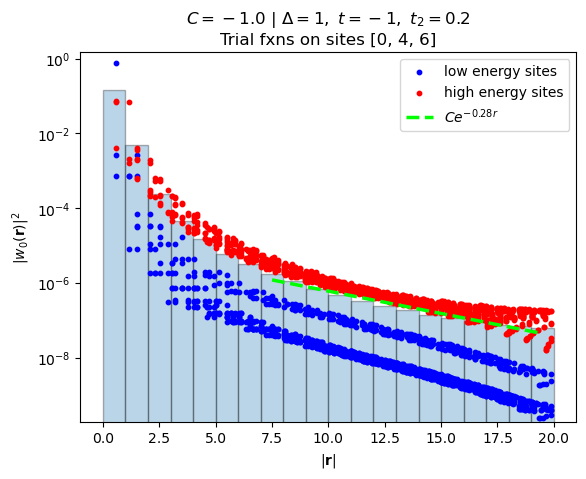

In [80]:
idx = 0
title = (rf"$C = {chern: .1f}$ | $\Delta = {delta},\ t = {t},\ t_2 = {t2}$"
        "\n" 
        rf"Trial fxns on sites {tf_list}"
         )
save_name = f'w_{idx}_scatter_C={chern:.1f}_Delta={delta}_t={t}_t2={t2}_tfxs={tf_list}.png'

plot.plot_Wan(W0, idx, orbs, lat_vecs, title=title, plot_phase=True, plot_decay=True, fit_rng=[7, 20])

0 Omega_I: 91.50150527538
1 Omega_I: 0.9434791603846092
2 Omega_I: 0.6158382423563012
3 Omega_I: 0.635617090155031
4 Omega_I: 0.620785266902996
5 Omega_I: 0.6107290751399606
6 Omega_I: 0.61001579810837
7 Omega_I: 0.6073872442794023
8 Omega_I: 0.6008502223939192
9 Omega_I: 0.599338976627975
10 Omega_I: 0.5962858006031397
11 Omega_I: 0.5916484997070112
12 Omega_I: 0.5893079257012666
13 Omega_I: 0.5862492264102716
14 Omega_I: 0.5825562001535702
15 Omega_I: 0.5799834786494651
16 Omega_I: 0.5770961452154318
17 Omega_I: 0.5740181007554357
18 Omega_I: 0.5714919547988522
19 Omega_I: 0.5688613077976303
20 Omega_I: 0.566213069410463
21 Omega_I: 0.5638524036002824
22 Omega_I: 0.5614841051175798
23 Omega_I: 0.5591564496728962
24 Omega_I: 0.5569939467044357
25 Omega_I: 0.5548628067359979
26 Omega_I: 0.5527871505462478
27 Omega_I: 0.5508176063136977
28 Omega_I: 0.5488920543388784
29 Omega_I: 0.5470217026522896
30 Omega_I: 0.5452267897781898
31 Omega_I: 0.5434774280543726
32 Omega_I: 0.54177835901549

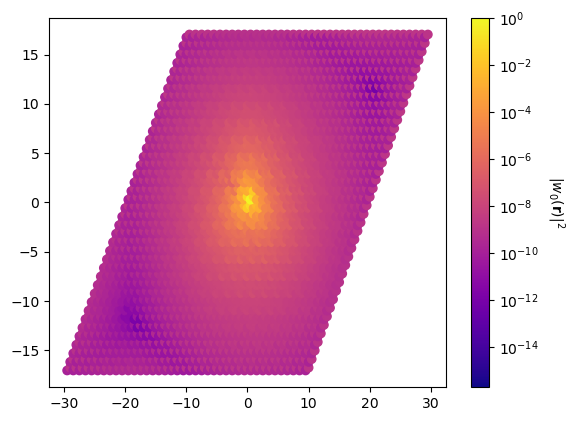

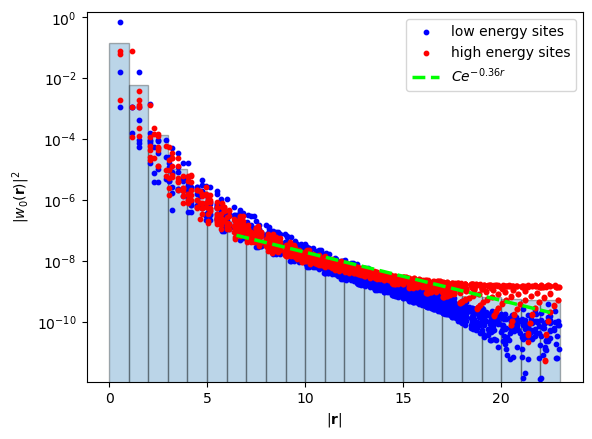

([<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 1 Axes>],
 [<Axes: >, <Axes: xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

In [81]:
# outer window of entangled bands is full occupied manifold
outer_states = u_wfs_Wan._wfs[..., :n_occ, :]
W0_max_loc, Wf_cntrs = max_loc_Wan(lat_vecs, orbs, u_wfs_Wan, tf_list, outer_states, 
        iter_num_omega_i=1000, iter_num_omega_til=1000,
        state_idx=None, verbose=True, return_uwfs=False, return_wf_centers=True, eps=2e-3
        )

Wan_idx = 0
plot.plot_Wan(W0_max_loc, Wan_idx, orbs, lat_vecs, plot_decay=True, show=True)

$$O_{n,m} = \langle w_{n} | w_m' \rangle$$

In [82]:
W0_max_loc_excl2 = W0_max_loc

In [75]:
W0_max_loc_excl4 = W0_max_loc

In [83]:
def get_overlap_mat(w0, w1):
    overlap_mat = np.zeros((w0.shape[-2], w1.shape[-2]), dtype=complex)
    for n in range(w0.shape[-2]):
        for m in range(w1.shape[-2]):
            overlap_mat[n, m] = np.sum(w0[..., n, :].conj() * w1[..., m, :])

    return overlap_mat

In [84]:
overlap = get_overlap_mat(W0_max_loc_excl2, W0_max_loc_excl4)    

sp.Matrix(overlap.round(8))

Matrix([
[   0.97170435 - 4.136e-5*I, 0.07926521 + 0.10842838*I, -0.01542788 + 0.00091763*I],
[ 0.07917288 + 0.10852887*I,  0.15070823 - 0.1981825*I,  0.07850875 + 0.10778625*I],
[-0.01542774 + 0.00089141*I,  0.07838957 + 0.1078418*I,    0.97170435 + 4.136e-5*I]])

In [ ]:
sp.latex(sp.Matrix(overlap.round(8)))

Excluded site = 4
$$O = \left[\begin{matrix}0.99464679 + 2.82 \cdot 10^{-6} i & 0.00203142 + 0.00407382 i & -0.00061745 + 0.0010906 i\\0.00214193 - 0.00418869 i & 0.99453265 - 3.25 \cdot 10^{-6} i & 0.00179394 - 0.00418116 i\\-0.00722182 + 0.00083689 i & 0.00166071 + 0.00395184 i & 0.99442027 + 2.18 \cdot 10^{-6} i\end{matrix}\right]$$

Excluded site = 2
$$O = \left[\begin{matrix}0.99464679 + 2.82 \cdot 10^{-6} i & 0.00203142 + 0.00407382 i & -0.00061745 + 0.0010906 i\\0.00214193 - 0.00418869 i & 0.99453265 - 3.25 \cdot 10^{-6} i & 0.00179394 - 0.00418116 i\\-0.00722182 + 0.00083689 i & 0.00166071 + 0.00395184 i & 0.99442027 + 2.18 \cdot 10^{-6} i\end{matrix}\right]$$